# <span style="color:#F72585"><center>Agrupamiento Espectral y Propagación de Afinidad</center></span>



<figure>
<center>
<img src="../Imagenes/spectral_clustering.jpg" width=800 height=800 align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Ssc2004-07a.jpg">Spitzer Space Telescope</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Autores</span>

* Alvaro Montenegro
* Daniel Montenegro

## <span style="color:#4361EE">Referencias</span>

1. [Spectral Clustering - Foundation and Application](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b)
1. [Spectral Clustering Algorithm Implemented From Scratch](https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045)

## <span style="color:#4361EE">Introducción</span>

## <span style="color:#4361EE">Clustering Espectral</span>

El enfoque de agrupación espectral se destaca como un algoritmo de aprendizaje automático no supervisado ampliamente reconocido, a menudo superando a otros enfoques disponibles. Lo que lo hace aún más atractivo es su simplicidad de implementación y su eficaz resolución a través de técnicas de álgebra lineal convencional.

En la agrupación espectral, en lugar de depender de la ubicación absoluta, como en el caso de k-medias, se basa en la afinidad para determinar qué puntos se agrupan juntos. Esta característica resulta especialmente beneficiosa para abordar problemas en los que los datos presentan formas complejas y poco convencionales.

## <span style="color:#4361EE">Algoritmo</span>

El algoritmo se puede dividir en 4 pasos básicos.

1. Construir un grafo de similitud
1. Determine la matriz de adyacencia $W$, la matriz de grados $D$ y la matriz laplaciana $L$.
1. Calcular los vectores propios de la matriz $L$.
1. Usando el segundo vector propio más pequeño como entrada, entrene un modelo de K-means y utilícelo para clasificar los datos.

En la mayoría de los casos, se manejará un conjunto de datos que consta de muestras dispuestas en filas, junto con sus características en columnas. No obstante, es esencial destacar que el algoritmo de agrupamiento espectral encuentra su aplicabilidad exclusivamente en la representación de gráficos de nodos interconectados.

![graph](../Imagenes/graph_node.png)

Fuente: <a href="https://commons.wikimedia.org/wiki/File:3_node_Directed_graph.png">Zacoste.fr</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Por tanto, debemos aplicar transformaciones a nuestros datos para poder pasar de una tabla de filas y columnas a una gráfica.

Supongamos que teníamos el siguiente conjunto de datos.

Podemos ver claramente que los datos se pueden segregar en tres grupos.

## <span style="color:#4361EE">Implementación</span>

In [7]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

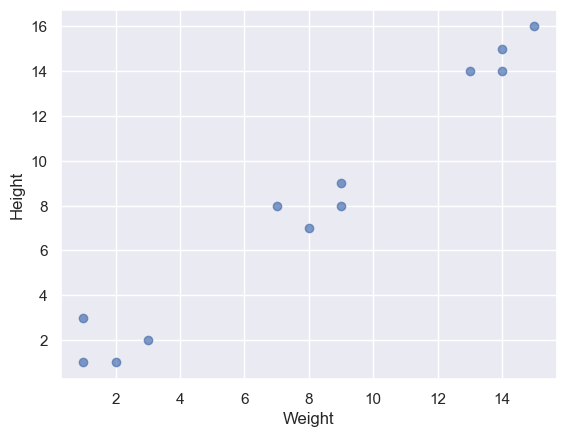

In [10]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height');

En primer lugar, procedemos a generar la matriz de similitud, que es una matriz $N \times N$, donde $N$ representa el número de muestras en el conjunto de datos. Cada celda de esta matriz se completa con la distancia euclidiana calculada entre cada par de puntos.

A continuación, creamos la matriz de adyacencia, que se obtiene duplicando el contenido de la matriz de similitud. Sin embargo, en esta etapa, se introduce un umbral predefinido. Si la distancia calculada entre dos puntos supera dicho límite, el valor en la celda correspondiente se establece en 0; de lo contrario, se establece en 1.

Una vez obtenida la matriz de adyacencia, esta se convierte en la base para la construcción de un grafo. Si en una celda de la matriz de adyacencia se registra un valor de 1, se traza un enlace entre los nodos que corresponden a la fila y la columna respectivas.

In [11]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [15]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

Para comenzar, generamos aleatoriamente un gráfico e imprimimos su matriz de adyacencia.

[[0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 1]
 [1 0 0 1 0 0 1 1 0 0]
 [1 0 1 0 0 1 0 1 0 1]
 [1 1 0 0 0 0 0 1 1 0]
 [1 0 0 1 0 0 0 0 1 0]
 [0 1 1 0 0 0 0 1 1 0]
 [0 0 1 1 1 0 1 0 0 1]
 [0 1 0 0 1 1 1 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]]


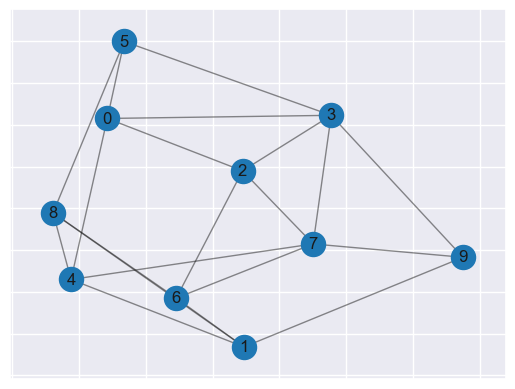

In [19]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

Observe cómo los nodos forman un solo componente (es decir, se puede llegar a todos los demás nodos desde un nodo determinado).

Una vez que hemos construido la matriz de adyacencia, construimos la matriz de grados.

Para cada fila de la matriz de grados llenamos la celda a lo largo de la diagonal sumando todos los elementos de la fila correspondiente en la matriz de adyacencia.

Luego, calculamos la matriz laplaciana restando la matriz de adyacencia de la matriz de grados.

In [21]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 3]]
laplacian matrix:
[[ 4  0 -1 -1 -1 -1  0  0  0  0]
 [ 0  4  0  0 -1  0 -1  0 -1 -1]
 [-1  0  4 -1  0  0 -1 -1  0  0]
 [-1  0 -1  5  0 -1  0 -1  0 -1]
 [-1 -1  0  0  4  0  0 -1 -1  0]
 [-1  0  0 -1  0  3  0  0 -1  0]
 [ 0 -1 -1  0  0  0  4 -1 -1  0]
 [ 0  0 -1 -1 -1  0 -1  5  0 -1]
 [ 0 -1  0  0 -1 -1 -1  0  4  0]
 [ 0 -1  0 -1  0  0  0 -1  0  3]]


Una vez que tenemos la matriz laplaciana, podemos aprovechar una de sus propiedades especiales para clasificar nuestros datos.

**Si el gráfico (W) tiene K componentes conectados, entonces L tiene K vectores propios con un valor propio de 0.**

Por lo tanto, dado que en nuestro ejemplo actual solo tenemos un componente, un valor propio será igual a 0.

In [22]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-0.000 7.053 2.050 2.310 2.874 3.548 4.765 6.189 5.706 5.504]
eigenvectors:
[[-0.316 0.294 -0.429 0.017 -0.093 -0.409 -0.452 0.052 0.496 -0.003]
 [-0.316 0.230 0.438 -0.217 0.149 -0.038 -0.539 0.126 -0.461 -0.256]
 [-0.316 -0.097 -0.155 0.289 -0.528 0.099 -0.166 -0.420 -0.410 0.350]
 [-0.316 -0.321 -0.249 0.298 0.082 0.043 0.063 0.764 -0.208 0.082]
 [-0.316 -0.440 0.131 -0.263 -0.038 -0.682 0.329 -0.162 -0.072 -0.120]
 [-0.316 -0.038 -0.565 -0.297 0.381 0.355 0.120 -0.296 -0.156 -0.308]
 [-0.316 -0.312 0.272 -0.101 -0.425 0.443 -0.046 0.053 0.459 -0.355]
 [-0.316 0.636 0.105 0.275 -0.159 -0.032 0.562 0.050 -0.047 -0.251]
 [-0.316 0.184 0.142 -0.519 0.059 0.172 0.178 0.127 0.135 0.691]
 [-0.316 -0.134 0.310 0.517 0.573 0.050 -0.049 -0.295 0.264 0.170]]


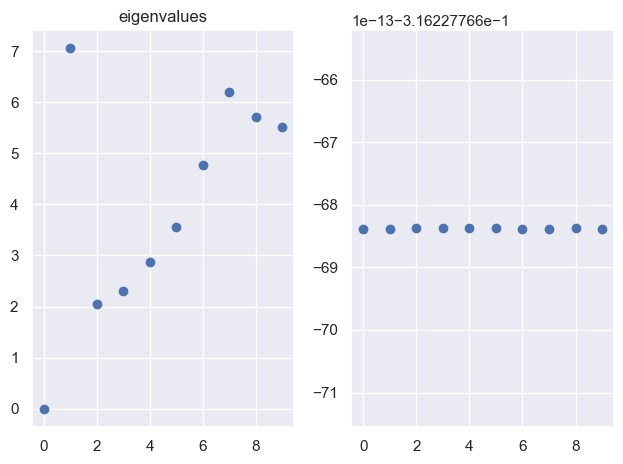

In [25]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e,'o')
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]], 'o')
fig.tight_layout()
plt.show()

Como podemos ver, de los 10 valores propios uno es igual a 0.

Echemos un vistazo a otro ejemplo.

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


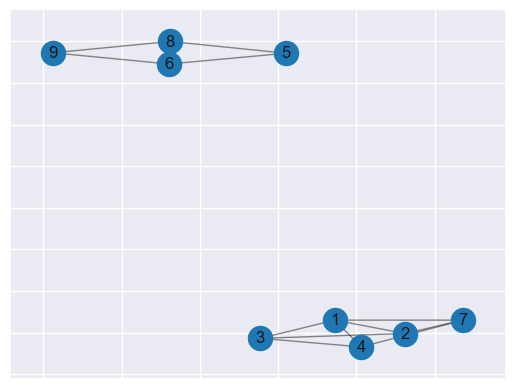

In [59]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [60]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [61]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.000 -0.000 3.000 5.000 3.000 4.000 0.000 4.000 2.000]
eigenvectors:
[[0.894 -0.447 0.000 -0.033 -0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.704 0.508 0.320 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.062 -0.491 -0.630 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.704 0.508 -0.320 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.062 -0.491 0.630 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.157 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.454 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.751 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.454 0.707]]


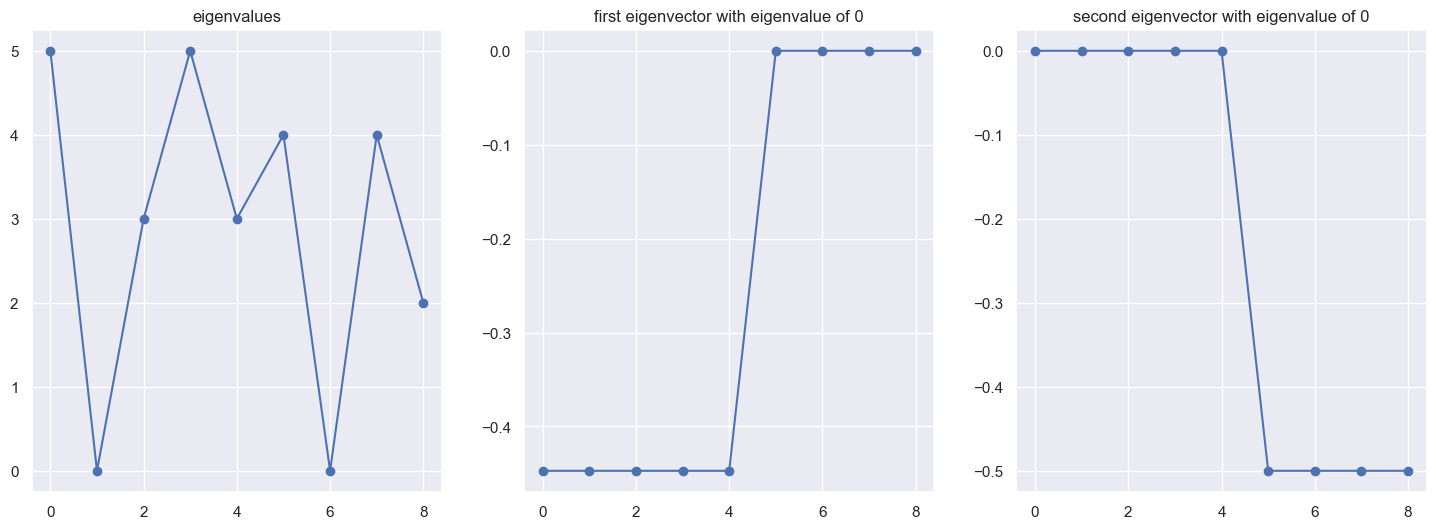

In [65]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e,'o-')
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]],'o-')
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]],'o-')
ax3.title.set_text('second eigenvector with eigenvalue of 0')

Si observamos más de cerca el gráfico de cada vector propio, podemos ver claramente que los primeros 5 nodos están asignados al mismo valor y los otros 5 nodos están asignados a otro valor.

Podemos utilizar este hecho para colocar los nodos en una de dos categorías.

En la práctica, utilizamos k-medias para clasificar los nodos en función de sus valores correspondientes en el vector propio.

Veamos otro ejemplo más complicado:

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


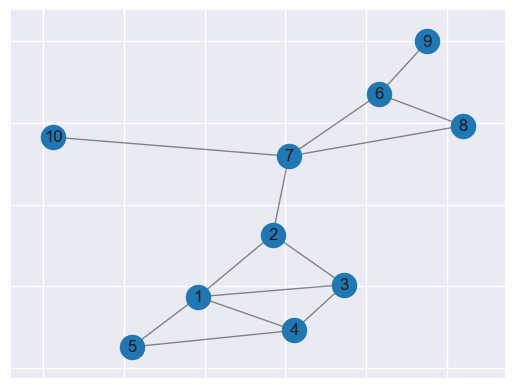

In [72]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [73]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0]
 [ 0 -1  0  0  0 -1  4 -1  0 -1]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0]
 [ 0  0  0  0  0  0 -1  0  0  1]]


In [74]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.485 4.898 4.398 3.801 3.155 -0.000 0.229 0.728 1.913 1.393]
eigenvectors:
[[-0.430 0.773 -0.021 0.068 -0.049 -0.316 -0.320 -0.047 -0.078 0.011]
 [0.478 -0.014 0.232 0.123 -0.532 -0.316 -0.154 0.054 -0.525 -0.130]
 [-0.092 -0.345 -0.592 0.021 0.378 -0.316 -0.303 -0.032 -0.430 -0.033]
 [0.181 -0.104 0.616 -0.207 0.522 -0.316 -0.364 -0.078 0.136 0.066]
 [0.071 -0.231 -0.248 0.077 -0.410 -0.316 -0.387 -0.099 0.656 0.127]
 [0.240 0.203 -0.244 -0.744 -0.028 -0.316 0.338 -0.164 0.083 -0.199]
 [-0.666 -0.401 0.288 -0.187 -0.246 -0.316 0.196 0.201 -0.062 -0.187]
 [0.122 0.068 -0.018 0.517 0.238 -0.316 0.301 0.029 0.244 -0.636]
 [-0.054 -0.052 0.072 0.266 0.013 -0.316 0.438 -0.603 -0.091 0.505]
 [0.148 0.103 -0.085 0.067 0.114 -0.316 0.254 0.739 0.068 0.476]]


Como tenemos una componente, sólo 1 valore propio será igual a cero. Sin embargo, si miramos el segundo valor propio más pequeño (**Valor de Fiedler**), aún podríamos distinguir entre estos dos grupos.

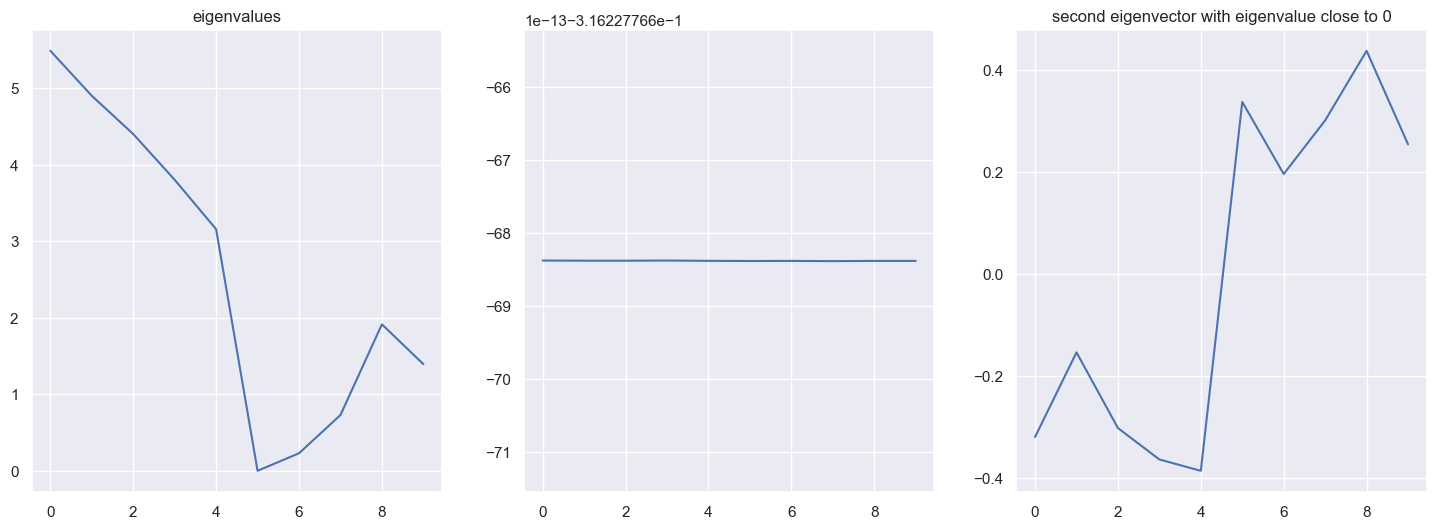

In [75]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')

[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


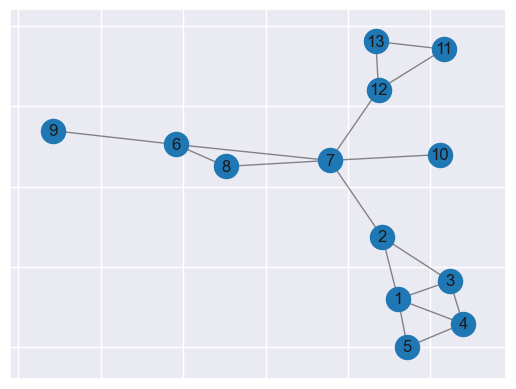

In [68]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [69]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [70]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.333 5.020 0.000 0.184 0.348 0.772 1.421 1.915 4.471 3.862 3.535 3.138
 3.000]
eigenvectors:
[[-0.136 0.867 -0.277 0.347 -0.078 0.040 0.009 -0.079 0.086 0.015 -0.092
  0.040 -0.000]
 [0.312 -0.253 -0.277 0.205 -0.014 -0.054 -0.127 -0.527 0.318 0.023
  -0.299 0.482 -0.000]
 [-0.070 -0.189 -0.277 0.333 -0.071 0.025 -0.035 -0.434 -0.667 0.008
  0.073 -0.355 0.000]
 [0.056 -0.231 -0.277 0.384 -0.096 0.069 0.062 0.135 0.577 -0.044 0.352
  -0.473 0.000]
 [0.018 -0.211 -0.277 0.403 -0.106 0.089 0.124 0.661 -0.269 0.016 -0.169
  0.380 -0.000]
 [0.220 0.077 -0.277 -0.152 0.355 0.113 -0.214 0.077 -0.087 -0.795 0.122
  0.025 -0.000]
 [-0.834 -0.166 -0.277 -0.102 0.113 -0.185 -0.174 -0.058 0.114 -0.042
  0.179 0.248 -0.000]
 [0.142 0.029 -0.277 -0.140 0.284 -0.059 -0.670 0.226 -0.011 0.450 -0.196
  -0.240 -0.000]
 [-0.041 -0.019 -0.277 -0.187 0.545 0.495 0.507 -0.084 0.025 0.278 -0.048
  -0.012 0.000]
 [0.156 0.041 -0.277 -0.125 0.174 -0.810 0.414 0.063 -0.033 0.015 -0.071
  -0.116 

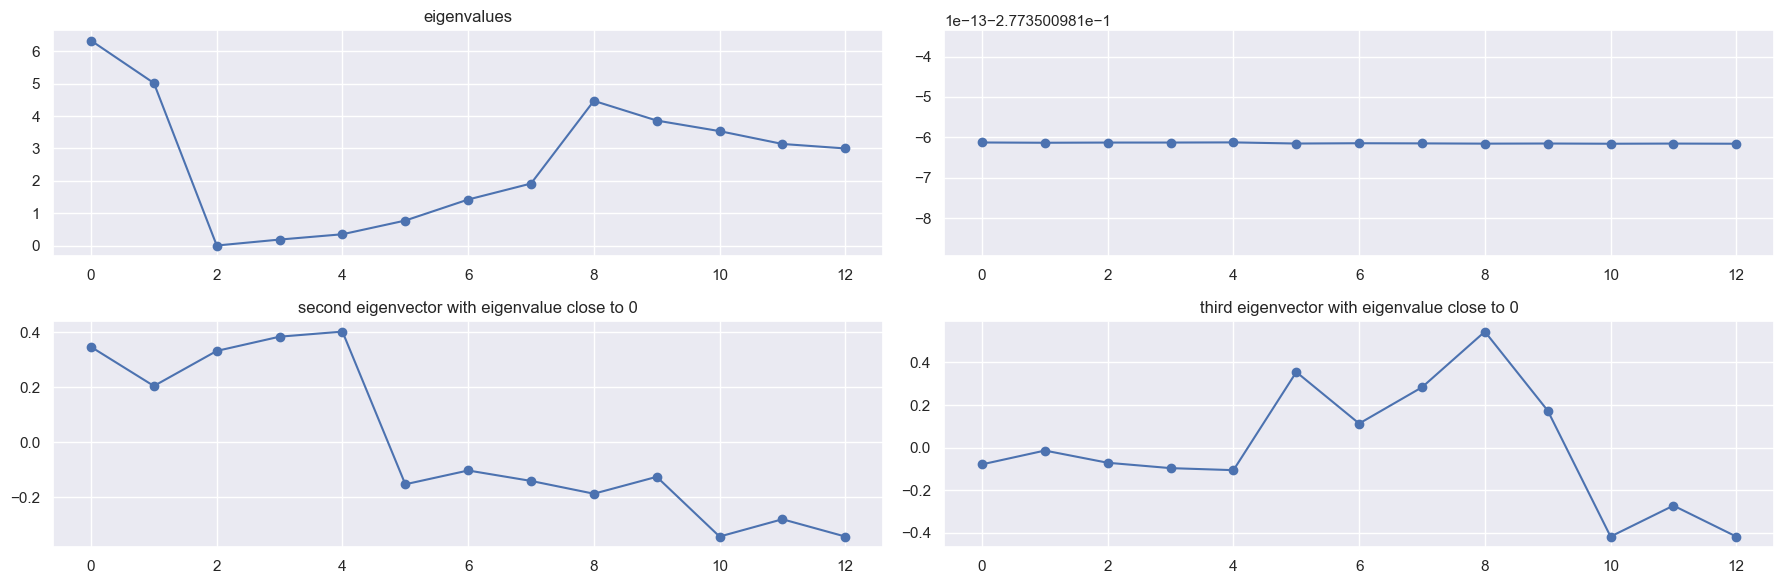

In [71]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e,'o-')
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]],'o-')
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]],'o-')
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]],'o-')
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

Como solo tenemos 1 componente, 1 valor propio será igual a 0.

Sin embargo, podemos usar nuevamente el segundo valor propio más pequeño para determinar qué nodo debe colocarse en qué categoría.

In [51]:
U = np.array(v[:, i[1]]).reshape(-1,1)
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

/Users/moury/miniforge3/envs/ocupaciones/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

A continuación, comparemos k-medias con la agrupación espectral utilizando la implementación de scitkit-learn. Supongamos que nuestros datos tomaron la siguiente forma cuando se graficaron.

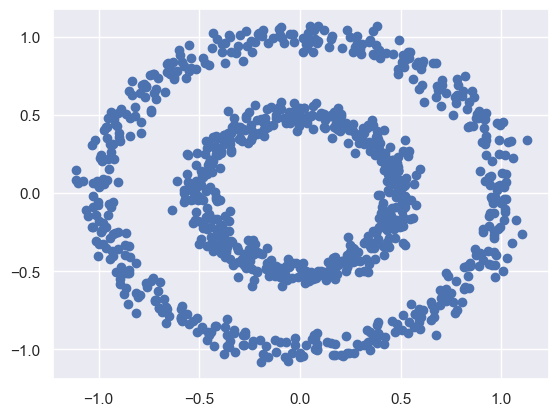

In [52]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1]);

Cuando usamos k-medias, obtenemos lo siguiente.

/Users/moury/miniforge3/envs/ocupaciones/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


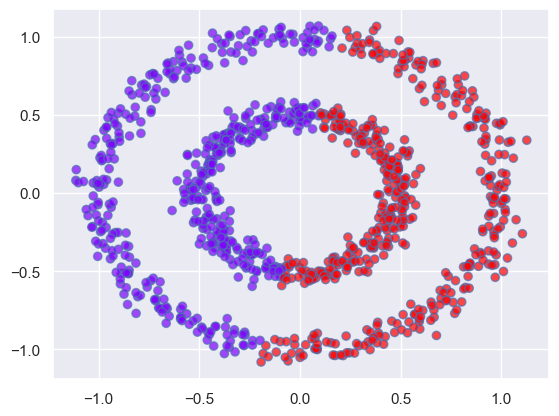

In [53]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b');

Por el contrario, cuando utilizamos agrupamiento espectral colocamos cada círculo en su propio grupo.

/Users/moury/miniforge3/envs/ocupaciones/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


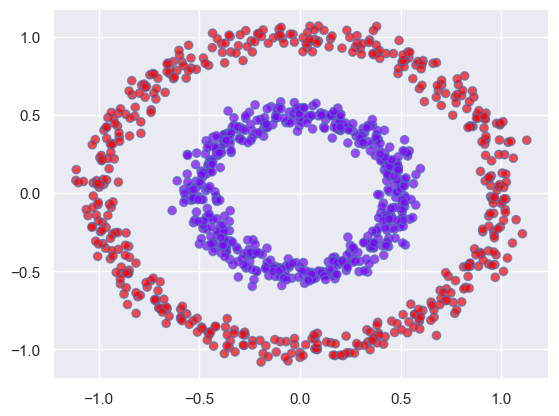

In [54]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b');